# Import all Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from xgboost import XGBClassifier 
from termcolor import colored as cl
from sklearn.metrics import accuracy_score
import numpy as np

from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
import sklearn
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load the Data

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check Null Values

In [4]:
# check if any null values are present
total = data.isnull().sum().sort_values(ascending = False)
total

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

# Check the Distribution 

We can observe that unlike other features, Time and Amount are not Zero Centered. This is because all the other features are PCA transformed.

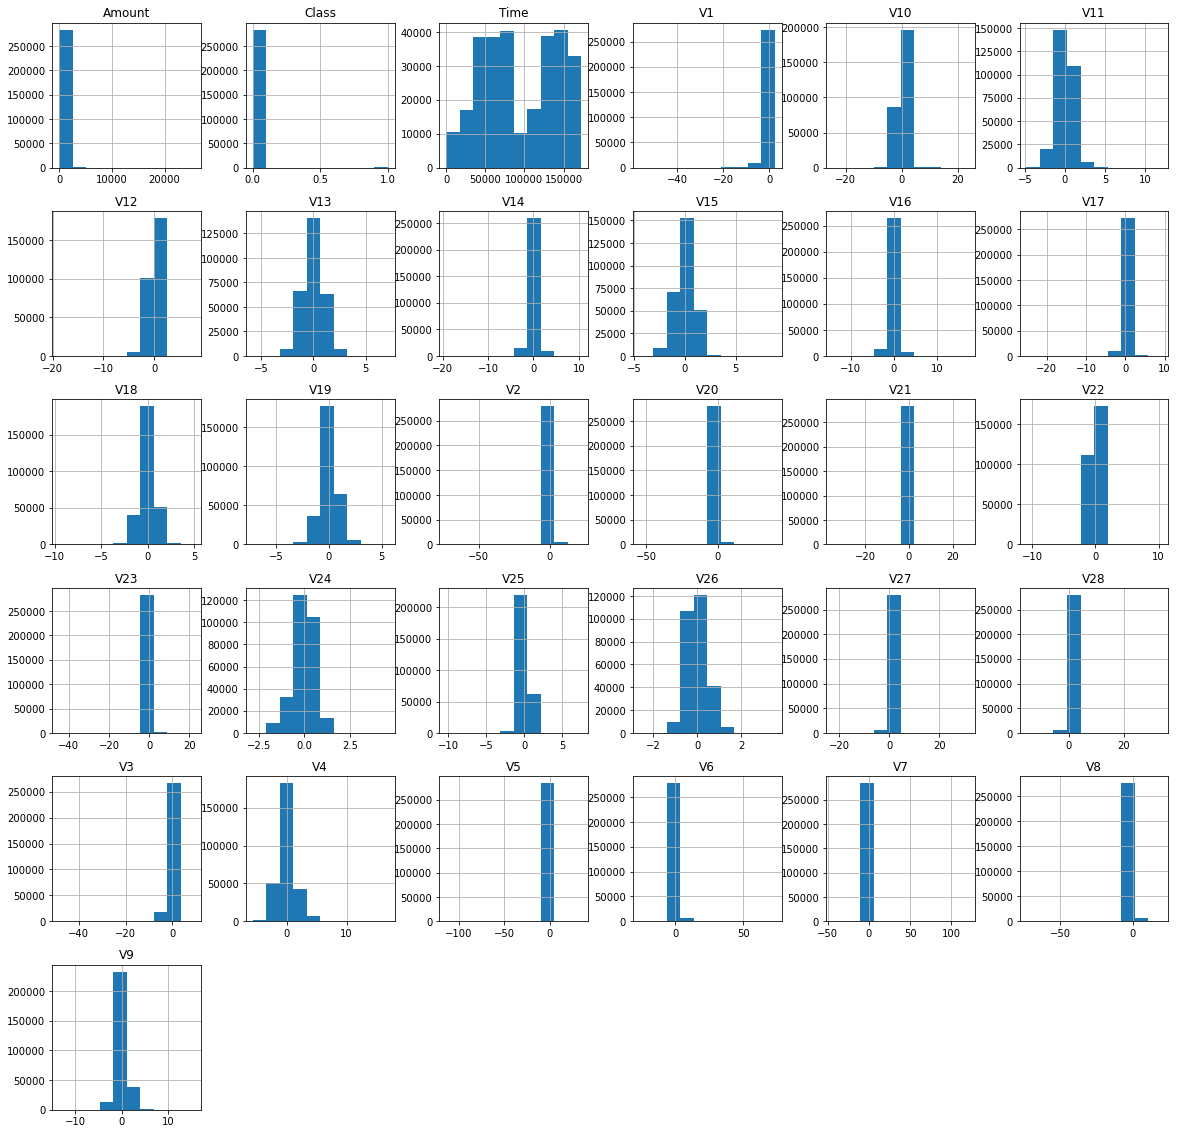

In [5]:
data.hist(figsize = (20,20))
plt.show()

# Check the Target class Distribution

We can observe that this is an imbalance Data Set

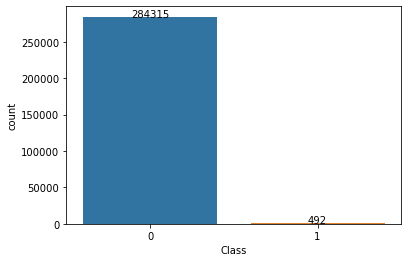

In [6]:

graph = sns.countplot(data['Class'])
i=0
for p in graph.patches:
    
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        data['Class'].value_counts()[i],ha="center")
    i += 1

# DISTRIBUTION OF TIME IN FRAUD AND NORMAL DATASETS

When the number of  normal transactions are at their minimum, Fraudulent transaction are more in number.
we can see  two dips in the normal transaction in the histogram, This can be night , where transactions are less.

In [7]:
fraud = data[data['Class'] == 1] 
normal= data[data['Class'] == 0] 

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('normal Transactions: {}'.format(len(data[data['Class'] == 0])))

Fraud Cases: 492
normal Transactions: 284315


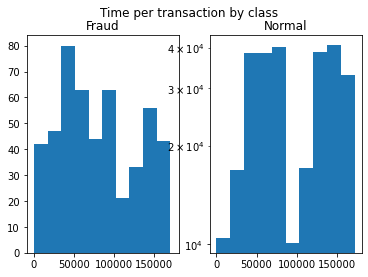

<Figure size 2160x2160 with 0 Axes>

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
fig.suptitle('Time per transaction by class')

bins = 10

ax1.hist(fraud.Time, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Time, bins = bins)
ax2.set_title('Normal')




plt.yscale('log')
plt.figure(figsize=(30,30))
plt.show()

# Check the correlation between different features and Target Variables

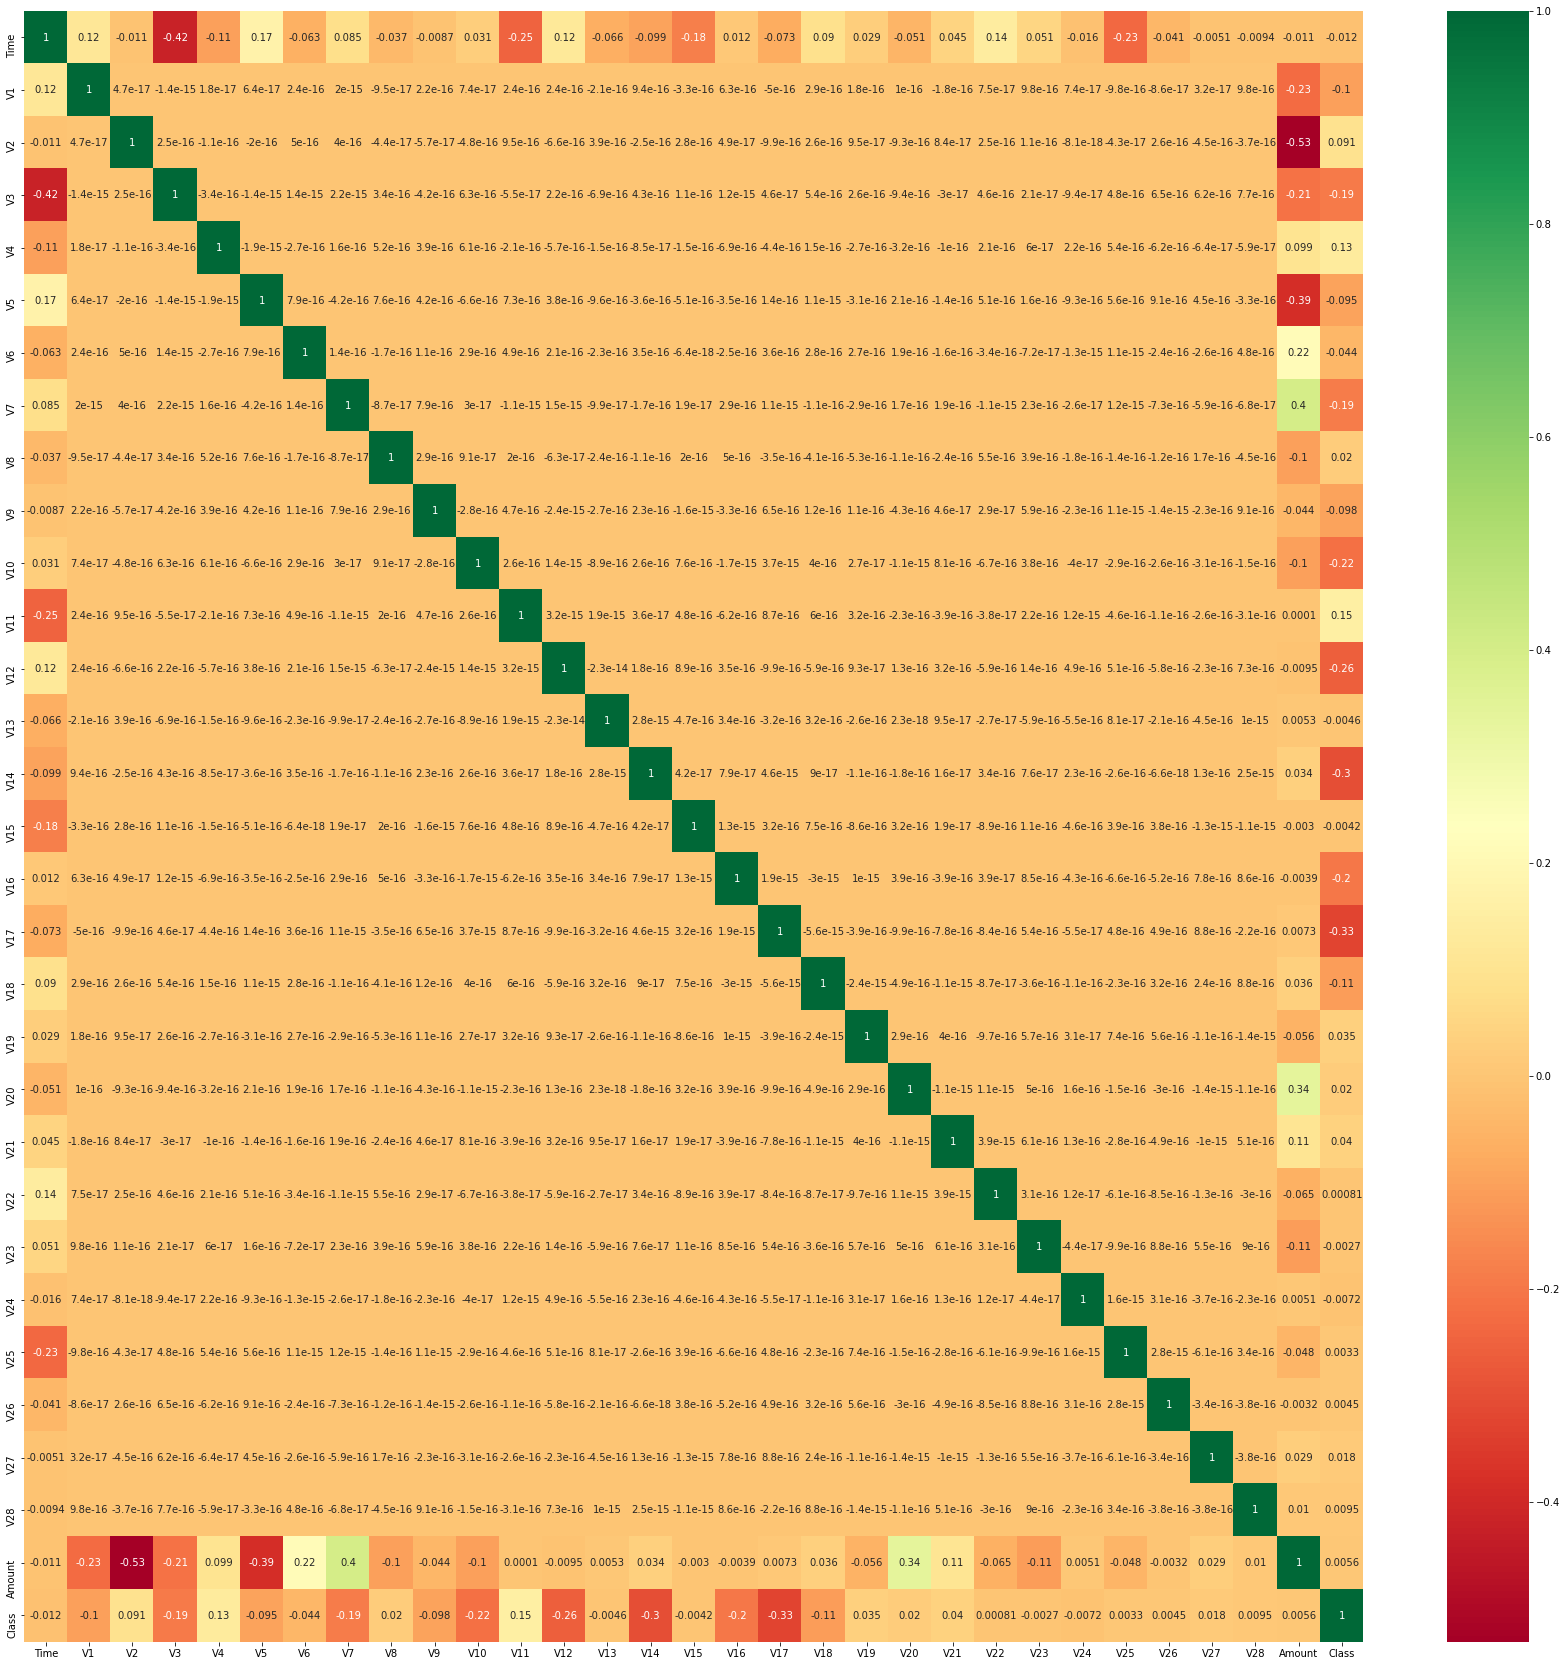

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot= True,cmap ='RdYlGn',fmt='.2g')
plt.show()

# Get the feature importance using extra tree classiffier

In [10]:
X = data.iloc[:,0:30]  #independent columns
y = data.iloc[:,-1] 

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

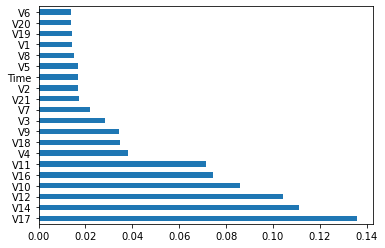

In [11]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Perform Train Test Split

In [12]:
X = data.iloc[:,0:30]  #independent columns
y = data.iloc[:,-1]  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208059,136954.0,-0.429070,0.712074,0.675855,-0.403577,0.668849,-0.413713,0.665961,0.099935,-0.379066,...,0.016809,-0.102000,-0.391487,-0.332563,-0.512572,0.746656,0.368231,-0.150931,-0.111220,29.95
260930,159780.0,-4.673996,-3.716208,-1.486611,0.829036,0.902701,-0.501887,2.994824,-1.188013,0.864683,...,-2.927002,-1.387099,0.414913,3.103269,0.642007,0.464011,0.027749,0.973848,-1.566714,533.05
75125,55911.0,-1.215390,1.379556,0.438732,1.394346,-0.377212,0.843496,-0.975098,-1.969737,-0.917814,...,0.659545,-1.230618,0.716991,0.107986,0.042642,-0.046630,-0.251591,0.234356,-0.035339,57.00
37292,38895.0,-0.632439,1.212284,1.388188,0.151509,-0.342824,-1.337771,0.648076,-0.046668,-0.103480,...,0.170883,-0.268740,-0.687707,0.082524,0.838322,-0.207461,0.046706,0.345269,0.168419,7.15


# Performed Scaling separately on training and test set to avoid data leakage problems

In [14]:
# scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)



In [15]:
X_train

array([[ 4.02560426e-01, -6.74191700e-02,  6.62092828e-02, ...,
         7.64065254e-01,  2.30266646e-01, -1.65692307e-01],
       [ 8.53047327e-01,  1.08257042e+00,  1.01952988e-02, ...,
        -1.70158963e-01, -1.77599513e-01, -3.52239267e-01],
       [ 6.46288197e-01, -4.43118809e-02,  1.01926421e-01, ...,
        -2.99606405e+00, -3.50916596e+00,  3.30885867e-01],
       ...,
       [-3.82812685e-01,  7.70180874e-01, -5.71231987e-01, ...,
        -3.46268902e-03,  1.12349878e-02, -2.18474816e-01],
       [ 5.16530677e-02,  9.15968459e-01, -1.02396940e+00, ...,
        -8.37542919e-02, -1.00003017e-01,  3.35802483e-01],
       [-4.19212902e-01, -3.00330857e-01,  4.52835762e-01, ...,
         2.15984197e-01,  3.63457529e-01, -2.95312172e-01]])

In [16]:
X_test = sc.transform(X_test)

# Introduced the model to be used for prediction

In [17]:
models = [{'name': 'lr','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=0)},
          
               {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier()},
          
          {'name': 'dt','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=0)
          },
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=0)
          }
          
          ]



# Perform modelling without fixing the imbalance issue

In [18]:
result_score = pd.DataFrame(columns=['classifiers', 'accuracy','recall','precision','F1 Score'])
scores = {}
def training_predict(trainer, X_train, y_train, X_test, y_test):
     # Initializing a Dictionary to store evaluation metrics
    
    trainer.fit(X_train, y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts
    
    results_dict = {}
    #Stores the result of trainer in its individual Key
    results_dict['classifier_name'] = trainer  
    yproba = trainer.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    results_dict['fpr'] = fpr
    results_dict['tpr'] = tpr
    results_dict['auc'] = auc
    results_dict['Accuracy_test'] = accuracy_score(y_test , Y_pred)  

    
    results_dict['Recall_test'] = recall_score(y_test , Y_pred)
   
    results_dict['Precision_test'] = precision_score(y_test , Y_pred)

    results_dict['F1_Score_test'] = f1_score(y_test , Y_pred)
    
   
    
    
    
    
    return results_dict
    
 

In [19]:
Unbalanced_result =[]
for m in models:    
    print(m['name'])    
    Unbalanced_result.append(training_predict(m['classifier'], 
                                  
                                   X_train, 
                                   y_train,X_test,y_test
                                              
                                   )) 
    
    
    print('completed')

lr
completed
knn
completed
dt
completed
rf
completed


In [22]:
RESULT1= pd.DataFrame(Unbalanced_result)

LogisticRegression(random_state=0)
KNeighborsClassifier()
DecisionTreeClassifier(random_state=0)
RandomForestClassifier(random_state=0)


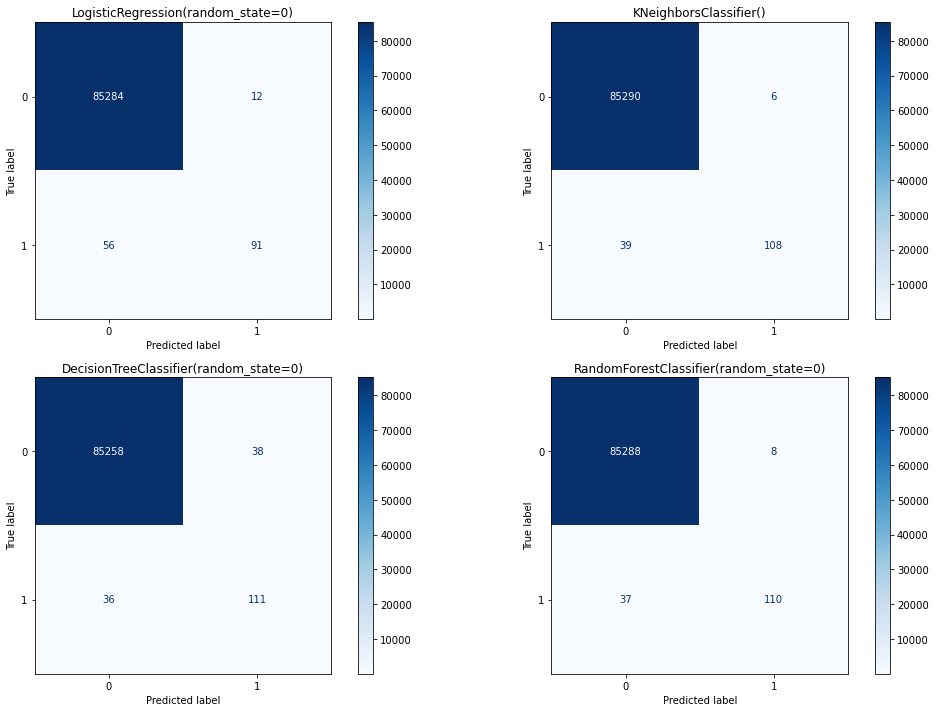

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i, (cls, ax) in enumerate(zip(Unbalanced_result, axes.flatten())):
    #print(results[i]['classifier'])
    #print((cls['classifier_name']))
    #print(cls.values())

    
    clf = list(cls.values())[0]
    print(clf)
    




 
    plot_confusion_matrix(clf, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues'
                         )
    ax.title.set_text(list(cls.values())[0])
plt.tight_layout()  
plt.show()

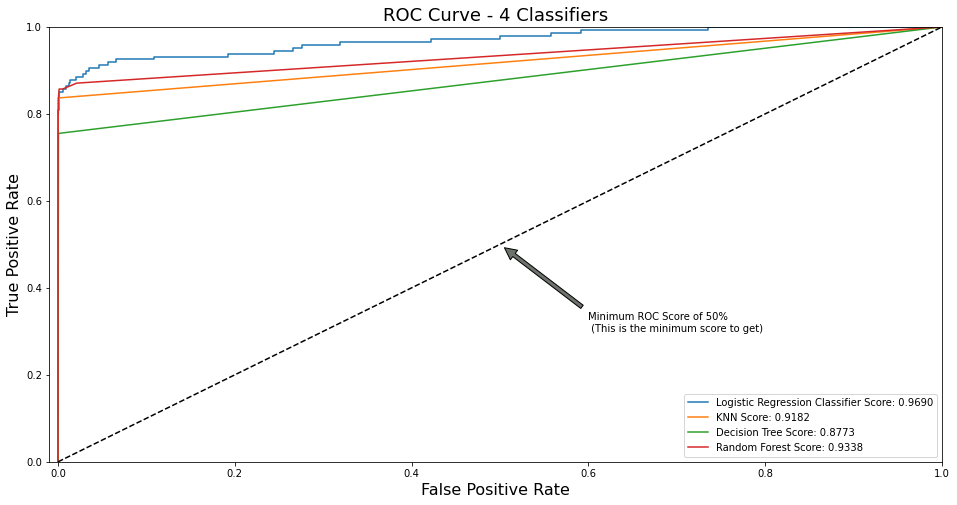

In [23]:

plt.figure(figsize=(16,8))
plt.title('ROC Curve - 4 Classifiers', fontsize=18)
plt.plot(RESULT1['fpr'][0], RESULT1['tpr'][0], label='Logistic Regression Classifier Score: {:.4f}'.format(RESULT1['auc'][0]))
plt.plot(RESULT1['fpr'][1], RESULT1['tpr'][1], label='KNN Score: {:.4f}'.format(RESULT1['auc'][1]))
plt.plot(RESULT1['fpr'][2], RESULT1['tpr'][2], label='Decision Tree Score: {:.4f}'.format(RESULT1['auc'][2]))
plt.plot(RESULT1['fpr'][3], RESULT1['tpr'][3], label='Random Forest Score: {:.4f}'.format(RESULT1['auc'][3]))
#plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, svc_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

      

# Apply SMOTE Technique to fix the imbalance issue.
 Perform hyperparameter optimization by Grid Search CV to chose right parameters for the model and also the Smote Ratio.

In [24]:
weights = np.linspace(0.005, 0.75, 10)
smote_models = [{'name': 'lr','label': 'Logistic Regression',
           'classifier': LogisticRegression(random_state=0),
            'SM':SMOTE(random_state=0),
           'grid': {'over__sampling_strategy':weights,'over__k_neighbors':[15],"model__C":[10], "model__penalty":["l2"]}},
          
          {'name': 'knn','label':'K Nearest Neighbors',
           'classifier':KNeighborsClassifier(),
           'grid': {'over__sampling_strategy':weights,'over__k_neighbors':[15],"model__n_neighbors":[3]}},
          
          {'name': 'dt','label': 'Descision Tree', 
           'classifier': DecisionTreeClassifier(random_state=0),
           'grid': {'over__sampling_strategy':weights,'over__k_neighbors':[15],"model__max_depth":[5]}},
          
          {'name': 'rf', 'label': 'Random Forest',
           'classifier': RandomForestClassifier(random_state=0),
           'grid': {'over__sampling_strategy':weights,'over__k_neighbors':[15],'model__n_estimators': [16],'model__max_features': ['auto'],
                    'model__max_depth' : [10],'model__criterion' :['entropy']}}
          
          ]

In [25]:
def model_selection(SM,classifier, name, grid, X_train, y_train, scoring,X_test,y_test):
    
    steps = [('over', SM), ('model', classifier)]
    pipeline = Pipeline(steps=steps)
    gridsearch_cv=GridSearchCV(pipeline, 
                               grid,
                               cv=5, 
                               scoring = scoring,n_jobs =-1,verbose =10000)
    
    gridsearch_cv.fit(X_train, y_train)
    Y_pred = gridsearch_cv.predict(X_test)
    results_dict = {}
  
    

    #Stores the result of trainer in its individual Key
  
    yproba = gridsearch_cv.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
 
    
   
    results_dict['classifier_name'] = name    
    results_dict['classifier'] = gridsearch_cv.best_estimator_
    results_dict['best_params'] = gridsearch_cv.best_params_
    results_dict['best_score'] = gridsearch_cv.best_score_
    results_dict['Accuracy_test'] = accuracy_score(y_test , Y_pred)  
    results_dict['fpr'] = fpr
    results_dict['tpr'] = tpr
    results_dict['auc'] = auc
    results_dict['Accuracy_test'] = accuracy_score(y_test , Y_pred)  

    
    results_dict['Recall_test'] = recall_score(y_test , Y_pred)
   
    results_dict['Precision_test'] = precision_score(y_test , Y_pred)

    results_dict['F1_Score_test'] = f1_score(y_test , Y_pred)

    
   
   
    
    return(results_dict)

# Here we have selected our scoring parameter as f1 , as the main expectation here is reduce both False Positive and False Negative.

In [43]:
Balanced_Result = []
SM= SMOTE()
for m in smote_models:    
    print(m['name'])    
    Balanced_Result.append(model_selection(SM, m['classifier'], 
                                   m['name'],
                                   m['grid'],
                                   X_train, 
                                   y_train,
                                   'f1',
                                   X_test,
                                   y_test
                                   )) 
    
    
    print('completed')

lr
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:   39.8s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   54.2s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Paralle

In [44]:
Balanced_Result

[{'classifier_name': 'lr',
  'classifier': Pipeline(steps=[('over', SMOTE(k_neighbors=15, sampling_strategy=0.005)),
                  ('model', LogisticRegression(C=10, random_state=0))]),
  'best_params': {'model__C': 10,
   'model__penalty': 'l2',
   'over__k_neighbors': 15,
   'over__sampling_strategy': 0.005},
  'best_score': 0.7737834789161757,
  'Accuracy_test': 0.9993211848834895,
  'fpr': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 5.86193960e-05, 5.86193960e-05, 7.03432752e-05,
         7.03432752e-05, 8.20671544e-05, 8.20671544e-05, 1.05514913e-04,
         1.05514913e-04, 1.17238792e-04, 1.17238792e-04, 1.28962671e-04,
         1.28962671e-04, 1.40686550e-04, 1.40686550e-04, 1.52410430e-04,
         1.52410430e-04, 1.87582067e-04, 1.87582067e-04, 1.99305946e-04,
         1.99305946e-04, 2.34477584e-04, 2.34477584e-04, 2.46201463e-04,
         2.46201463e-04, 2.57925342e-04, 2.57925342e-04, 2.69649222e-04,
         2.696492

In [45]:
RESULT2= pd.DataFrame(Balanced_Result)

In [46]:
RESULT2

,classifier_name,classifier,best_params,best_score,Accuracy_test,fpr,tpr,auc,Recall_test,Precision_test,F1_Score_test
0,lr,"(SMOTE(k_neighbors=15, sampling_strategy=0.005...","{'model__C': 10, 'model__penalty': 'l2', 'over...",0.773783,0.999321,"[0.0, 0.0, 0.0, 0.0, 0.0, 5.8619395985743764e-...","[0.0, 0.006802721088435374, 0.0204081632653061...",0.970464,0.748299,0.839695,0.791367
1,knn,"(SMOTE(k_neighbors=15, sampling_strategy=0.005...","{'model__n_neighbors': 3, 'over__k_neighbors':...",0.822875,0.999321,"[0.0, 8.206715438004127e-05, 0.000339992496717...","[0.0, 0.7551020408163265, 0.8027210884353742, ...",0.921643,0.802721,0.802721,0.802721
2,dt,"(SMOTE(k_neighbors=15, sampling_strategy=0.005...","{'model__max_depth': 5, 'over__k_neighbors': 1...",0.828094,0.999438,"[0.0, 3.517163759144626e-05, 0.000128962671168...","[0.0, 0.14965986394557823, 0.7006802721088435,...",0.921664,0.768707,0.889764,0.824818
3,rf,"(SMOTE(k_neighbors=15, sampling_strategy=0.005...","{'model__criterion': 'entropy', 'model__max_de...",0.849593,0.999555,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.172...","[0.0, 0.2857142857142857, 0.32653061224489793,...",0.975614,0.789116,0.943089,0.859259


Pipeline(steps=[('over', SMOTE(k_neighbors=15, sampling_strategy=0.005)),
                ('model', LogisticRegression(C=10, random_state=0))])
Pipeline(steps=[('over', SMOTE(k_neighbors=15, sampling_strategy=0.005)),
                ('model', KNeighborsClassifier(n_neighbors=3))])
Pipeline(steps=[('over', SMOTE(k_neighbors=15, sampling_strategy=0.005)),
                ('model', DecisionTreeClassifier(max_depth=5, random_state=0))])
Pipeline(steps=[('over', SMOTE(k_neighbors=15, sampling_strategy=0.005)),
                ('model',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=16, random_state=0))])


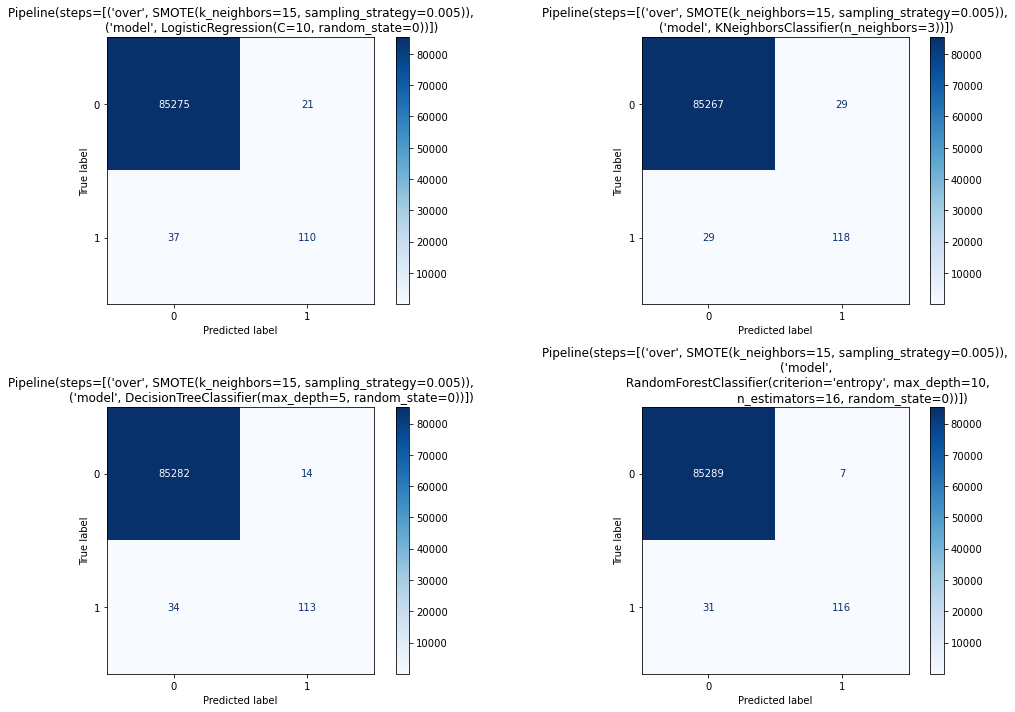

In [48]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
for i, (cls, ax) in enumerate(zip(Balanced_Result, axes.flatten())):
    #print(results[i]['classifier'])
    #print((cls['classifier_name']))
    #print(cls.values())

    clf = list(cls.values())[1]
    print(clf)
    
   



 
    plot_confusion_matrix(clf, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues'
                         )
    ax.title.set_text(list(cls.values())[1])
plt.tight_layout()  
plt.show()

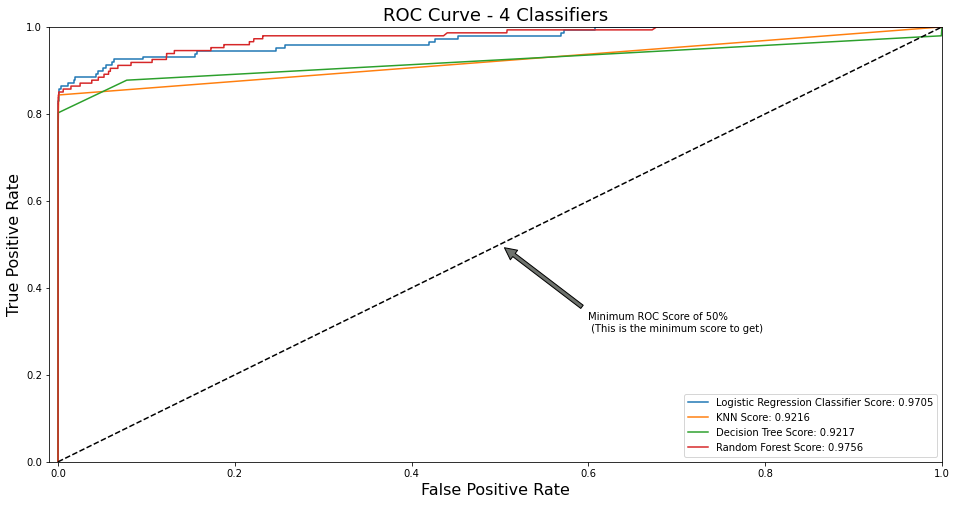

In [49]:

plt.figure(figsize=(16,8))
plt.title('ROC Curve - 4 Classifiers', fontsize=18)
plt.plot(RESULT2['fpr'][0], RESULT2['tpr'][0], label='Logistic Regression Classifier Score: {:.4f}'.format(RESULT2['auc'][0]))
plt.plot(RESULT2['fpr'][1], RESULT2['tpr'][1], label='KNN Score: {:.4f}'.format(RESULT2['auc'][1]))
plt.plot(RESULT2['fpr'][2], RESULT2['tpr'][2], label='Decision Tree Score: {:.4f}'.format(RESULT2['auc'][2]))
plt.plot(RESULT2['fpr'][3], RESULT2['tpr'][3], label='Random Forest Score: {:.4f}'.format(RESULT2['auc'][3]))
#plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, svc_pred)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()
plt.show()

# Recall score for imbalanced data set

In [54]:
RESULT1[['classifier_name','Recall_test']]

,classifier_name,Recall_test
0,LogisticRegression(random_state=0),0.619048
1,KNeighborsClassifier(),0.734694
2,DecisionTreeClassifier(random_state=0),0.755102
3,"(DecisionTreeClassifier(max_features='auto', r...",0.748299


# Recall score after applying Smote 

In [55]:
RESULT2[['classifier_name','Recall_test']]

,classifier_name,Recall_test
0,lr,0.748299
1,knn,0.802721
2,dt,0.768707
3,rf,0.789116
